基于github上的一个学习项目进行https://github.com/Avik-Jain/100-Days-Of-ML-Code  
由浅入深，省去前期手工推导，练习中引入库来完成。  
一般一天更新一次练习，我会将里面的英文引导翻译成中文。  
久违的，终于赶上进程，不过似乎已经有人做了100天的翻译，这里就是学习记录了。
### 什么是决策树
决策树是一种监督学习算法，它主要应用于分类问题，适用于可分类、连续输入和输出变量。  
决策树是一棵树，其每一个分支节点代表多个选项，每一个叶片节点代表最终的决策。  
### 举例
图中的散点图是二维的，决策树如何处理？  
在几次迭代中切片处理会有什么结果？  
我们将数据分割，并构建决策树。稍后使用决策树完成任务。
### 决策树算法：ID3
ID3（Iterative Dichotomizer 3 迭代二分器），其基本思路是通过对一个数据集使用从上至下的贪婪查找测试每一个树节点的属性来构建决策树。  
听起来很简单，但是哪些节点我们应该选择用来建立正确和最有价值的决策树？我们如何确定这些？我们有一些评估方法能够帮助我们选择最好的选项。  
#### 流程
A是最好的属性，将A分配为每个节点的决策属性。  
对A的每个值创建一个子节点，将训练示例排序。  
如果示例分类良好就停止  
如果没有很好分类就进一步迭代
#### 信息增益
最好属性是给出最大信息增益。广义上说是一种数学方法，通过选择特定属性来获取需要的信息量。其真正意义在于，基于已有的特定属性值，我们有的数据表格随机性下降。  
$Gain(S,A)=Entropy(S)-\Sigma_v\cfrac{|S_v|}{|S|}Entropy(S_v)$
- S：训练样本集
- A：特别属性
- $|S_v|$：$|S_v|$个数
- $|S|$：$|S|$个数
- v：属性的可能值
#### 熵
熵在机器学习中的含义与热力学中的一致，如果是随机性度量的话。  
$Entropy=-\Sigma_vp(v)log_2p(v)$
- v：属性的可能值
步骤：  
1.计算数据集的熵  
2.对于每一个属性/特征：
 - 计算每一个分类的熵
 - 计算正确属性的平均信息熵
 - 计算正确属性的增益  

3.拾取最高增益属性  
4.重复知道完成决策树

### 实现一个决策树分类，并进行可视化
和之前我们完成的demo相比，这是一个简单的决策树分类，没有做任何约束
#### 引入必要库和数据集
~~~python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dataset=pd.read_excel('.\socialnetwork_ads.xlsx')
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values
~~~
#### 分割数据并进行特征缩放
~~~python
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
~~~
#### 训练模型并使用测试集进行预测
~~~python
tree_clf=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
~~~
#### 数据可视化
~~~python
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, tree_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, tree_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
~~~

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
dataset=pd.read_excel('.\socialnetwork_ads.xlsx')
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [33]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [35]:
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [36]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# X_set
# y_set
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# start=X_set[:,0].min()-1

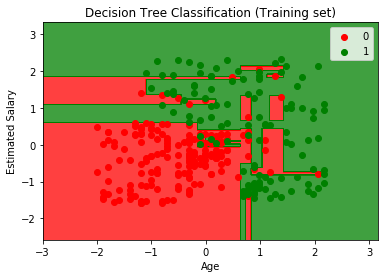

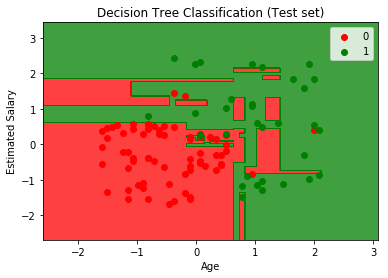

In [37]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, tree_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, tree_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()